In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'

df = pd.read_csv(file_path , parse_dates=['date'] , index_col='date')
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


#### 1) 원본데이터
- a: 분산이 시간의 흐름에 따라 증가
- b: 추세가 있음
- c: 1년 주기의 계절성이 있음
- a, b, c를 봤을 때 비정상확률과정(non-stationary process)이다.

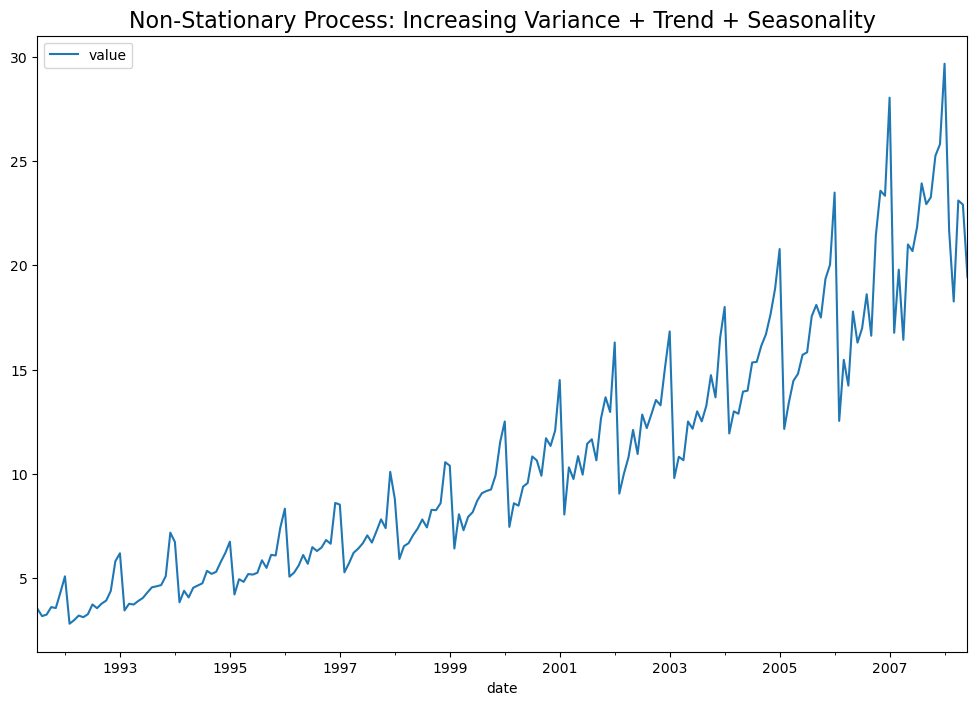

In [2]:
df.plot(figsize=[12, 8])
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', fontsize=16)
plt.show()

정상성 확인을 위한 ADF test

In [4]:
from statsmodels.tsa.stattools import adfuller
def ADF(data):

    result = adfuller(data, autolag="AIC")

    print("---- Adfuller ----")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF(df)

---- Adfuller ----
ADF Statistic: 3.145186
p-value: 1.0000000000
Lag: 15
observation: 188
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


In [5]:
adfuller(df)

(3.1451856893067442,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

##### ADF test 해석
- p-value가 0.05 미만일 때, 해당 데이터는 정상성을 가진다고 볼 수 있음

#### 2) a 해결과정
- log변환: 분산을 일정하게 하기 위해

In [5]:
import numpy as np

df_vsf = np.log(df)
df_vsf.head()

,value
date,
1991-07-01,1.260332
1991-08-01,1.157161
1991-09-01,1.179338
1991-10-01,1.283986
1991-11-01,1.271408


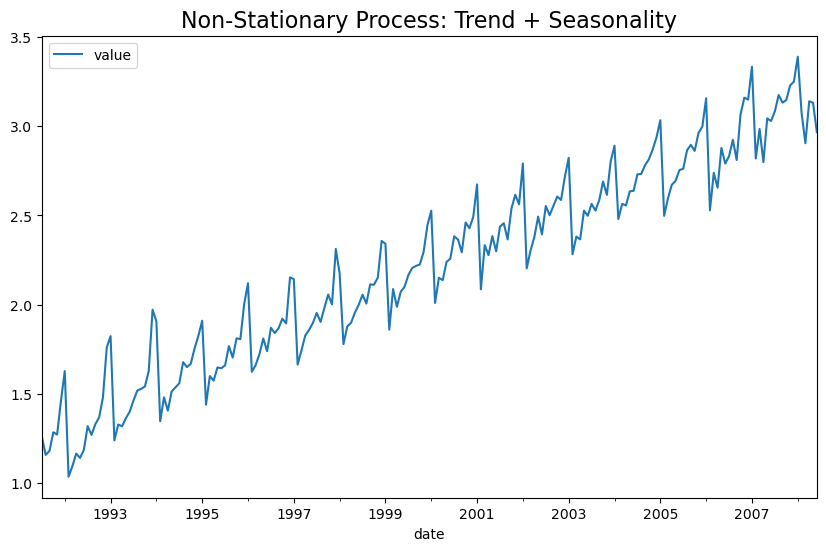

In [6]:
df_vsf.plot(figsize=[10, 6])
plt.title('Non-Stationary Process: Trend + Seasonality', fontsize=16)
plt.show()

#### 3) b 해결과정
- 차분 : 추세를 없애기 위해

In [7]:
df_vsf.diff(1)
df_vsf_diff1 = df_vsf.diff(1).iloc[1:, :]

In [8]:
df_vsf_diff1

,value
date,
1991-08-01,-0.103170
1991-09-01,0.022177
1991-10-01,0.104647
1991-11-01,-0.012578
1991-12-01,0.188688
...,...
2008-02-01,-0.314777
2008-03-01,-0.170220
2008-04-01,0.235181


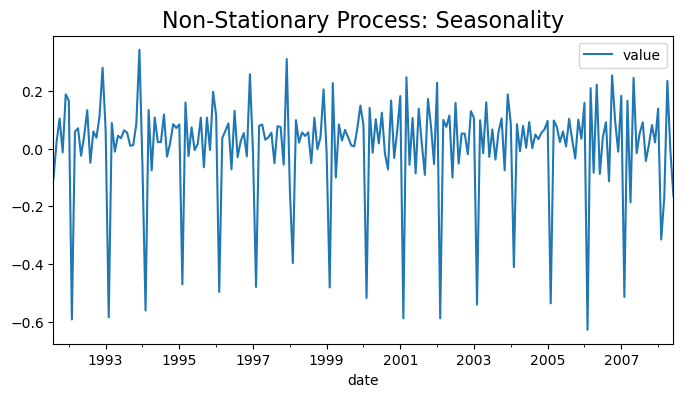

In [9]:
df_vsf_diff1.plot(figsize=[8, 4])
plt.title('Non-Stationary Process: Seasonality', fontsize=16)
plt.show()

In [15]:
ADF(df_vsf_diff1)

---- Adfuller ----
ADF Statistic: -4.519432
p-value: 0.0001813384
Lag: 13
observation: 189
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


#### 4) c 해결과정
- 차분 : 계절성을 없애기 위해

In [10]:
df_vsf_diff1.diff(12).isna().sum()

value    12
dtype: int64

In [11]:
# 차분, timelag : 12, 계절성 제거
df_vsf_diff1_diff12 = df_vsf_diff1.diff(12).dropna()

In [12]:
df_vsf_diff1_diff12

,value
date,
1992-08-01,0.054076
1992-09-01,0.037390
1992-10-01,-0.066394
1992-11-01,0.123880
1992-12-01,0.092449
...,...
2008-02-01,0.199572
2008-03-01,-0.336310
2008-04-01,0.421552


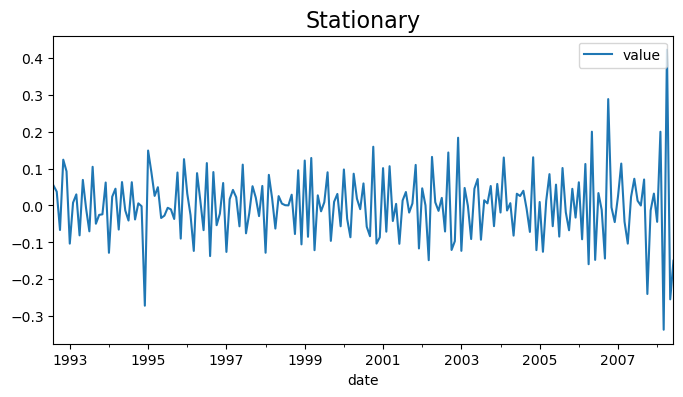

In [13]:
df_vsf_diff1_diff12.plot(figsize=[8, 4])
plt.title('Stationary', fontsize=16)
plt.show()

In [20]:
ADF(df_vsf_diff1_diff12)

---- Adfuller ----
ADF Statistic: -4.785546
p-value: 0.0000579565
Lag: 13
observation: 177
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576
